<a href="https://colab.research.google.com/github/Balu4ok/MyProject/blob/main/%D0%93%D0%B0%D1%80%D0%BA%D1%83%D1%88%D0%B0_%D0%9E%D0%BB%D1%8C%D0%B3%D0%B0%2C_%D0%BF%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

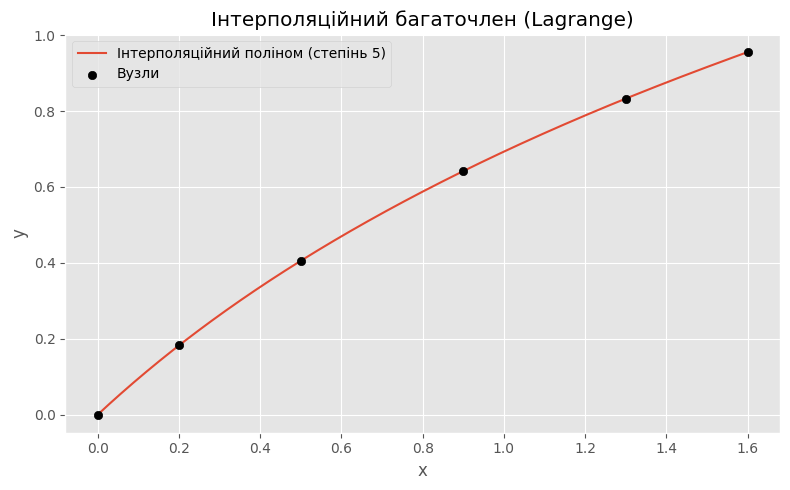

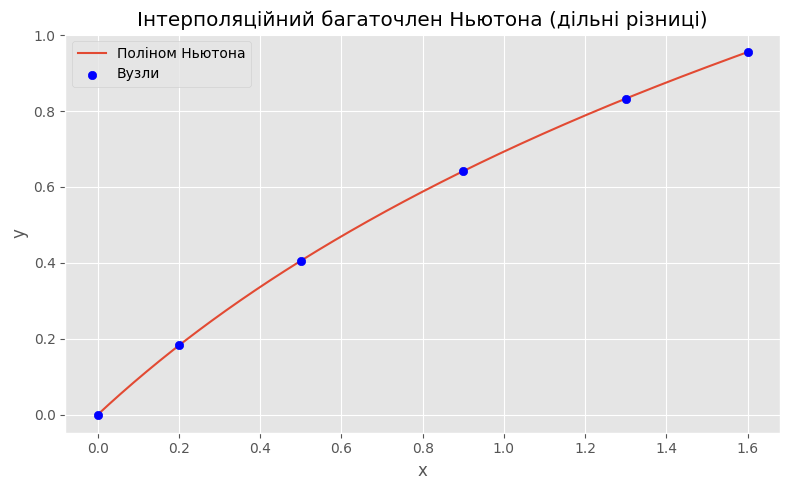

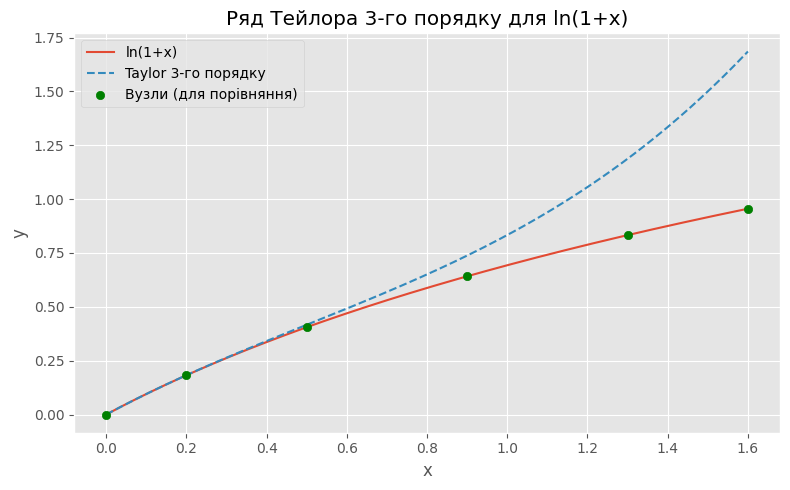

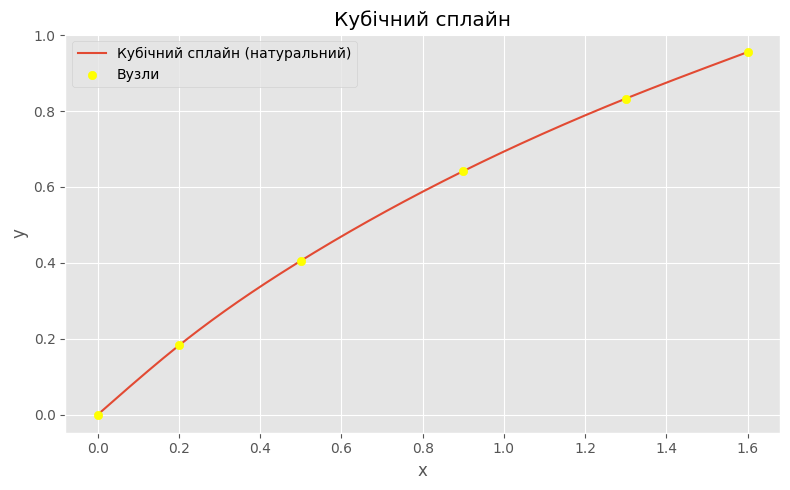


--- Коефіцієнти інтерполяційного полінома (Lagrange), від найстаршого степеня до вільного члена ---
x^5: 0.0155247034711
x^4: -0.0916287135484
x^3: 0.248485416865
x^2: -0.476956108326
x^1: 0.997769995173
x^0: 0

Символьний вигляд полінома (скорочено):
                   5                       4                     3             ↪
0.015524703471132⋅x  - 0.0916287135483557⋅x  + 0.24848541686488⋅x  - 0.4769561 ↪

↪           2                      
↪ 08326197⋅x  + 0.997769995173477⋅x

--- Таблиця дільних різниць ---
       x         f(x)          Δ^1         Δ^2         Δ^3         Δ^4         Δ^5
  0.0000     0.000000     0.911610    -0.335600     0.130290    -0.046607     0.015525 
  0.2000     0.182322     0.743810    -0.218339     0.069700    -0.021768 
  0.5000     0.405465     0.590973    -0.141669     0.039226 
  0.9000     0.641854     0.477637    -0.098520 
  1.3000     0.832909     0.408673 
  1.6000     0.955511 

--- Коефіцієнти полінома Ньютона (a0, a1, ... ) ---
a0 = 0
a1 

In [ ]:
# Colab-ready code: інтерполяція, ряд Тейлора, кубічний сплайн, графіки
# Залежності: numpy, matplotlib, scipy, sympy (sympy опціонально для гарного виводу полінома)
# В colab вони зазвичай вже встановлені; якщо ні, розкоментуй рядок нижче:
# !pip install scipy sympy

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import sympy as sp

# Вхідні дані (з фото)
xi = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
yi = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# 1) Інтерполяційний багаточлен (Lagrange)
V = np.vander(xi, increasing=False)   # матриця Вандермонда
coeffs_lagrange = np.linalg.solve(V, yi)

def eval_poly(coeffs, x):
    return np.polyval(coeffs, x)

# (опційно) символьний вигляд полінома
x_sym = sp.symbols('x')
poly_sym = sum(sp.N(c) * x_sym**p for c, p in zip(coeffs_lagrange, range(len(coeffs_lagrange)-1, -1, -1)))
poly_sym_simpl = sp.expand(poly_sym)

# 2) Поліном Ньютона (дільні різниці)
def divided_differences(xs, ys):
    n = len(xs)
    dd = np.zeros((n, n))
    dd[:, 0] = ys.astype(float)
    for j in range(1, n):
        for i in range(n - j):
            dd[i, j] = (dd[i+1, j-1] - dd[i, j-1]) / (xs[i+j] - xs[i])
    return dd

dd = divided_differences(xi, yi)
newton_coeffs = dd[0, :len(xi)]

def newton_eval(xs, a, x):
    x = np.array(x)
    if x.ndim == 0:
        res = a[-1]
        for k in range(len(a)-2, -1, -1):
            res = res * (x - xs[k]) + a[k]
        return res
    else:
        res = np.full_like(x, a[-1], dtype=float)
        for k in range(len(a)-2, -1, -1):
            res = res * (x - xs[k]) + a[k]
        return res

# 3) Ряд Тейлора 3-го порядку для ln(1+x) (Maclaurin)
def taylor3(x):
    return x - x**2 / 2.0 + x**3 / 3.0

# 4) Кубічний сплайн (натуральний)
cs = CubicSpline(xi, yi, bc_type='natural')

# Підготовка сітки
x_plot = np.linspace(xi[0], xi[-1], 400)

# Побудова і збереження графіків
# !!! Виправлення: seaborn-darkgrid більше не використовується
# plt.style.use('seaborn-darkgrid')  # <-- цю лінію видалено
plt.style.use('ggplot')  # безпечна заміна, працює у всіх версіях matplotlib

# 1) Lagrange polynomial
plt.figure(figsize=(8,5))
plt.plot(x_plot, eval_poly(coeffs_lagrange, x_plot), label='Інтерполяційний поліном (степінь 5)')
plt.scatter(xi, yi, color='black', zorder=5, label='Вузли')
plt.title('Інтерполяційний багаточлен (Lagrange)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig('plot_lagrange.png', dpi=150)
plt.show()

# 2) Newton polynomial
plt.figure(figsize=(8,5))
plt.plot(x_plot, newton_eval(xi, newton_coeffs, x_plot), label="Поліном Ньютона")
plt.scatter(xi, yi, color='blue', zorder=5, label='Вузли')
plt.title('Інтерполяційний багаточлен Ньютона (дільні різниці)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig('plot_newton.png', dpi=150)
plt.show()

# 3) Taylor 3rd order vs ln(1+x)
plt.figure(figsize=(8,5))
plt.plot(x_plot, np.log(1 + x_plot), label='ln(1+x)')
plt.plot(x_plot, taylor3(x_plot), '--', label='Taylor 3-го порядку')
plt.scatter(xi, yi, color='green', zorder=5, label='Вузли (для порівняння)')
plt.title('Ряд Тейлора 3-го порядку для ln(1+x)')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig('plot_taylor.png', dpi=150)
plt.show()

# 4) Cubic spline
plt.figure(figsize=(8,5))
plt.plot(x_plot, cs(x_plot), label='Кубічний сплайн (натуральний)')
plt.scatter(xi, yi, color='yellow', zorder=5, label='Вузли')
plt.title('Кубічний сплайн')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig('plot_spline.png', dpi=150)
plt.show()

# Виведення результатів
np.set_printoptions(precision=12, suppress=True)

print("\n--- Коефіцієнти інтерполяційного полінома (Lagrange), від найстаршого степеня до вільного члена ---")
for p, c in zip(range(len(coeffs_lagrange)-1, -1, -1), coeffs_lagrange):
    print(f"x^{p}: {c:.12g}")

print("\nСимвольний вигляд полінома (скорочено):")
sp.pprint(poly_sym_simpl)

print("\n--- Таблиця дільних різниць ---")
n = len(xi)
header = ["x", "f(x)"] + [f"Δ^{k}" for k in range(1, n)]
print("{:>8s} {:>12s} ".format(header[0], header[1]), end="")
for h in header[2:]:
    print("{:>12s}".format(h), end="")
print()
for i in range(n):
    print(f"{xi[i]:8.4f} {yi[i]:12.6f} ", end="")
    for j in range(1, n - i):
        print(f"{dd[i,j]:12.6f} ", end="")
    print()

print("\n--- Коефіцієнти полінома Ньютона (a0, a1, ... ) ---")
for i, a in enumerate(newton_coeffs):
    print(f"a{i} = {a:.12g}")

# Збереження коефіцієнтів у файли
with open('coeffs_lagrange.txt', 'w') as f:
    f.write("Коефіцієнти інтерполяційного полінома (найстарший -> найменший):\n")
    for p, c in zip(range(len(coeffs_lagrange)-1, -1, -1), coeffs_lagrange):
        f.write(f"x^{p}: {c:.12g}\n")

with open('newton_coeffs.txt', 'w') as f:
    f.write("Коефіцієнти полінома Ньютона (a0, a1, ...):\n")
    for i, a in enumerate(newton_coeffs):
        f.write(f"a{i} = {a:.12g}\n")


